In [1]:
import os
from collections import defaultdict
import pandas as pd
import geopandas as gpd
import json
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_dir = "../../data"
os.listdir(data_dir)

['bus_stops_wszone.dbf',
 'bus_stops_wszone.shp',
 'net_202001_weekday_G.net',
 'singstat',
 'net_202001_weekend_G.net',
 'origin_destination_bus_202001_scaleddown.csv.xz',
 'net_202001_weekendb.net',
 'OD_bus',
 'net_202001_weekdayb.net',
 'train_station_wszone.prj',
 'origin_destination_train_202001.csv.xz',
 'train_station_wszone.dbf',
 'OD_202001_weekend.csv.xz',
 'subzone_centroid.csv',
 'transport_node_bus_202001.csv',
 'train_station_wszone.cpg',
 'OD_PT',
 'train_station_wszone.shx',
 'planning-area-2014',
 'subzone_centroid_pos.json',
 '.ipynb_checkpoints',
 'origin_destination_bus_202001.csv.xz',
 'region-2014',
 'train_station_wszone.shp',
 'OD_train',
 'bus_stops_wszone.shx',
 'OD_202001_weekday.csv.xz',
 'bus_stops_wszone.prj',
 'subzone-2014',
 'bus_stops_wszone.cpg']

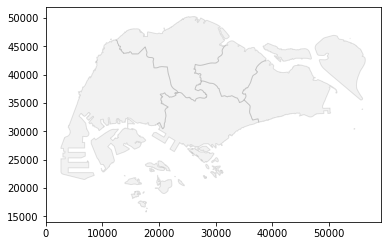

In [4]:
region = gpd.read_file("../../data/region-2014/MP14_REGION_WEB_PL.shp")
region.plot(color="grey", edgecolor="k", alpha=0.1)

In [5]:
with open(os.path.join("../../data", 'subzone_centroid_pos.json'), 'r') as fread:
    pos = json.load(fread)
pos["MARINA SOUTH"]

[31595.83574613999, 29220.18737674884]

In [6]:

res_dir = "../b-calculation/results/"

In [7]:
weekday_res = pd.read_csv(res_dir+"Super_SR_weekday.csv", index_col=0)
weekend_res = pd.read_csv(res_dir+"Super_SR_weekend.csv", index_col=0)

In [8]:
weekday_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,TAMPINES EAST,0.386216,0.386730,0.364033,0.423249,0.423249,0.398408
1,SERANGOON CENTRAL,0.273305,0.225932,0.256277,0.242025,0.206932,0.228909
2,BEDOK NORTH,0.267416,0.268577,0.250001,0.242039,0.244966,0.225299
3,GEYLANG EAST,0.290295,0.279854,0.270455,0.278489,0.273845,0.261286
4,TOA PAYOH CENTRAL,0.478774,0.409355,0.466794,0.500865,0.437605,0.486484


In [9]:
weekend_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,TAMPINES EAST,0.419848,0.420812,0.394425,0.463243,0.463910,0.434821
1,SERANGOON CENTRAL,0.431501,0.373766,0.404616,0.324492,0.291370,0.305882
2,BEDOK NORTH,0.315739,0.320273,0.294261,0.292274,0.302506,0.270560
3,GEYLANG EAST,0.351558,0.350794,0.326263,0.345434,0.350232,0.323039
4,TOA PAYOH CENTRAL,0.655967,0.584085,0.637284,0.646048,0.589542,0.627213


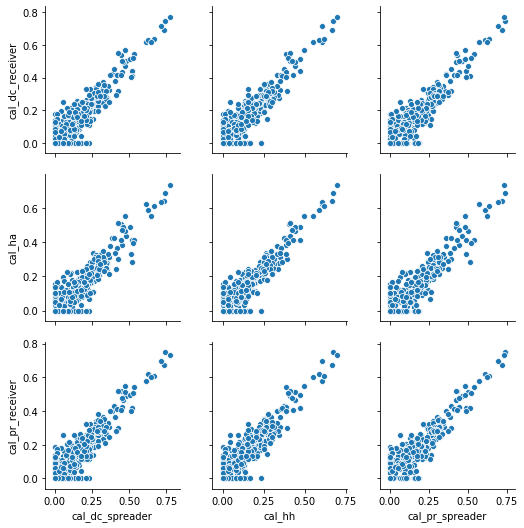

In [10]:
sns.pairplot(weekday_res,  x_vars=["cal_dc_spreader", "cal_hh", "cal_pr_spreader"], y_vars=["cal_dc_receiver","cal_ha","cal_pr_receiver"])

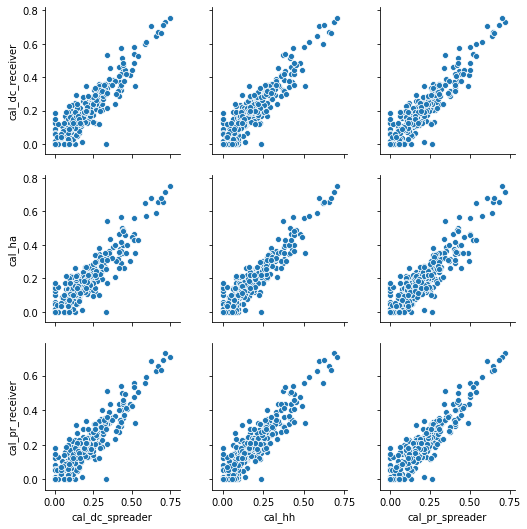

In [11]:
sns.pairplot(weekend_res,  x_vars=["cal_dc_spreader", "cal_hh", "cal_pr_spreader"], y_vars=["cal_dc_receiver","cal_ha","cal_pr_receiver"])

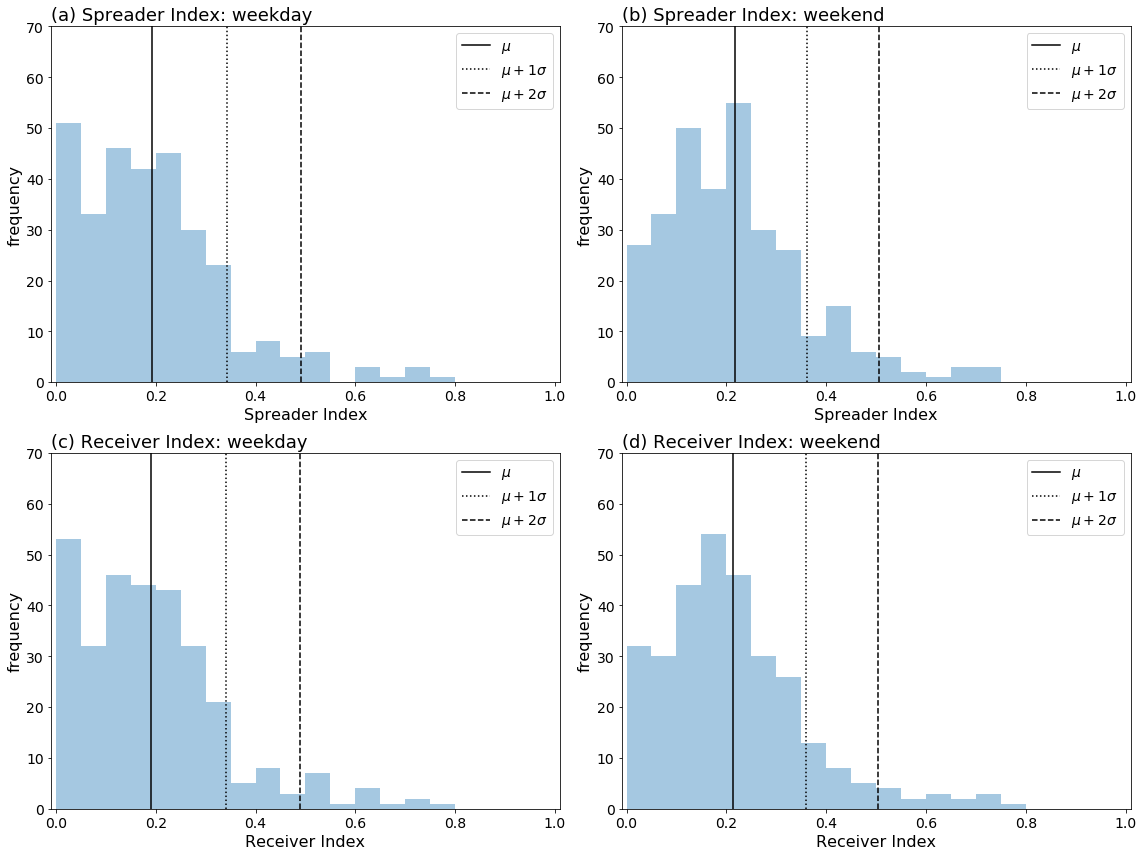

In [12]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()

dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
labs = "abcd"
labs2 = ["Spreader Index: weekday", "Spreader Index: weekend", "Receiver Index: weekday", "Receiver Index: weekend"]
xlabs = ["Spreader Index", "Spreader Index", "Receiver Index", "Receiver Index"]
for i in range(4):
    ax = axs[i]
    this_df = dfs[i]
    this_col = cols[i]
    sns.distplot(this_df[this_col], kde=False, ax=ax, bins=[ i*0.05 for i in range(21) ])
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,70.01])
    ax.set_xticks([ i*0.2 for i in range(6) ])
    ax.set_xticklabels([ round(i*0.2, 1) for i in range(6) ], fontsize=14)
    ax.set_yticks([ i*10 for i in range(8) ])
    ax.set_yticklabels([ i*10 for i in range(8) ], fontsize=14)
    l0 = ax.axvline(x=this_df[this_col].mean(), ls="-", c="k", label="$\mu$")
    l2 = ax.axvline(x=this_df[this_col].mean()+1*this_df[this_col].std(), ls=":", c="k", label="$\mu+1\sigma$")
    l1 = ax.axvline(x=this_df[this_col].mean()+2*this_df[this_col].std(), ls="--", c="k", label="$\mu+2\sigma$")
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=18)
    ax.set_xlabel(xlabs[i], fontsize=16)
    ax.set_ylabel("frequency", fontsize=16)
    ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig("../b-calculation/figs/SR_index_threevlines.png", dpi=100, bbox_inches="tight")

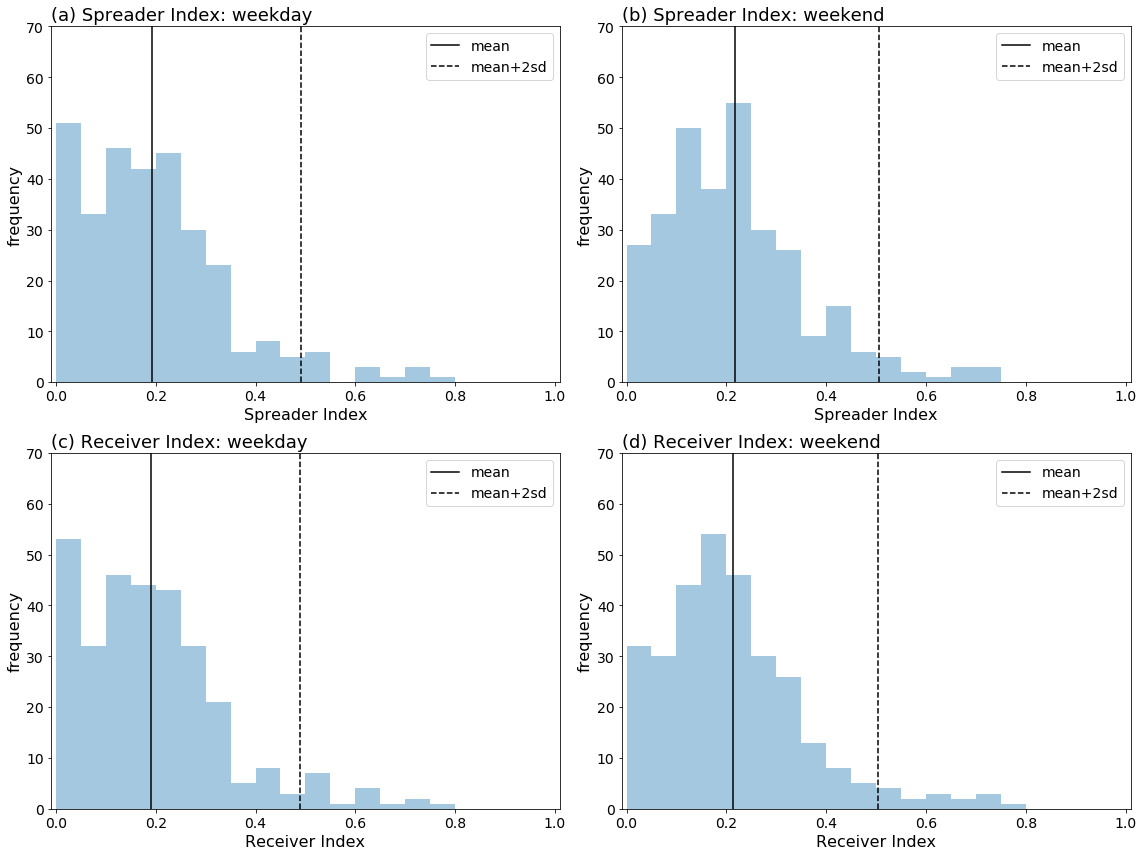

In [13]:
fig, axg = plt.subplots(2,2, figsize=(16,12))
axs = axg.flatten()

dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
labs = "abcd"
labs2 = ["Spreader Index: weekday", "Spreader Index: weekend", "Receiver Index: weekday", "Receiver Index: weekend"]
xlabs = ["Spreader Index", "Spreader Index", "Receiver Index", "Receiver Index"]
for i in range(4):
    ax = axs[i]
    this_df = dfs[i]
    this_col = cols[i]
    sns.distplot(this_df[this_col], kde=False, ax=ax, bins=[ i*0.05 for i in range(21) ])
    ax.set_xlim([-0.01,1.01])
    ax.set_ylim([-0.01,70.01])
    ax.set_xticks([ i*0.2 for i in range(6) ])
    ax.set_xticklabels([ round(i*0.2, 1) for i in range(6) ], fontsize=14)
    ax.set_yticks([ i*10 for i in range(8) ])
    ax.set_yticklabels([ i*10 for i in range(8) ], fontsize=14)
    l0 = ax.axvline(x=this_df[this_col].mean(), ls="-", c="k", label="mean")
    l1 = ax.axvline(x=this_df[this_col].mean()+2*this_df[this_col].std(), ls="--", c="k", label="mean+2sd")
    #l2 = ax.axvline(x=this_df[this_col].mean()+1*this_df[this_col].std(), ls=":", c="k", label="mean+1sd")
    ax.set_title("({}) {}".format(labs[i], labs2[i]), loc="left", fontsize=18)
    ax.set_xlabel(xlabs[i], fontsize=16)
    ax.set_ylabel("frequency", fontsize=16)
    ax.legend(fontsize=14)
plt.tight_layout()
plt.savefig("../b-calculation/figs/SR_index.png", dpi=100, bbox_inches="tight")

In [13]:
dfs = [weekday_res, weekend_res, weekday_res, weekend_res]
cols = ["cal_dc_spreader", "cal_dc_spreader", "cal_dc_receiver", "cal_dc_receiver"]
for i in range(4):
    this_df = dfs[i]
    this_col = cols[i]
    print(this_col)
    print(this_df[this_col].mean())
    print(this_df[this_col].mean()+1*this_df[this_col].std())
    print(this_df[this_col].mean()+2*this_df[this_col].std())
    temp = this_df[this_df[this_col]>=this_df[this_col].mean()+2*this_df[this_col].std()]
    print(len(temp))

cal_dc_spreader
0.19341260292051055
0.34221918341503743
0.4910257639095643
14
cal_dc_spreader
0.21701794782878578
0.3612827704249699
0.5055475930211542
14
cal_dc_receiver
0.19136885966867573
0.34052023448759006
0.4896716093065044
17
cal_dc_receiver
0.21384634974113859
0.359200547136704
0.5045547445322696
15


In [14]:
col = "cal_pr_receiver"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_pr_receiver
ind,,
204,JURONG WEST CENTRAL,0.748344
237,WOODLANDS REGIONAL CENTRE,0.731562
261,CHOA CHU KANG CENTRAL,0.696609
205,JURONG GATEWAY,0.671621
239,SEMBAWANG CENTRAL,0.623002
275,YISHUN WEST,0.607541
286,BUKIT BATOK CENTRAL,0.600901
238,WOODLANDS EAST,0.576541
240,WOODLANDS WEST,0.551254


In [15]:
col = "cal_dc_receiver"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_dc_receiver
ind,,
237,WOODLANDS REGIONAL CENTRE,0.771579
204,JURONG WEST CENTRAL,0.744637
261,CHOA CHU KANG CENTRAL,0.715821
205,JURONG GATEWAY,0.689382
275,YISHUN WEST,0.632857
239,SEMBAWANG CENTRAL,0.627170
286,BUKIT BATOK CENTRAL,0.620309
238,WOODLANDS EAST,0.616207
240,WOODLANDS WEST,0.567160


In [16]:
col = "cal_dc_spreader"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_dc_spreader
ind,,
237,WOODLANDS REGIONAL CENTRE,0.772479
204,JURONG WEST CENTRAL,0.737731
205,JURONG GATEWAY,0.733459
261,CHOA CHU KANG CENTRAL,0.714085
275,YISHUN WEST,0.664467
286,BUKIT BATOK CENTRAL,0.648233
239,SEMBAWANG CENTRAL,0.626422
238,WOODLANDS EAST,0.612356
262,JELEBU,0.533988


In [17]:
col = "cal_pr_spreader"

this_mean = weekday_res[col].mean()
this_std = weekday_res[col].std()
weekday_res[weekday_res[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)

,node,cal_pr_spreader
ind,,
204,JURONG WEST CENTRAL,0.737731
237,WOODLANDS REGIONAL CENTRE,0.733606
205,JURONG GATEWAY,0.720788
261,CHOA CHU KANG CENTRAL,0.694559
275,YISHUN WEST,0.635543
286,BUKIT BATOK CENTRAL,0.627371
239,SEMBAWANG CENTRAL,0.614601
238,WOODLANDS EAST,0.572103
262,JELEBU,0.540446


In [18]:
def get_top(df, col, times_std=2):
    this_mean = df[col].mean()
    this_std = df[col].std()
    return df[df[col]>=this_mean+times_std*this_std][["node", col]].sort_values(by=col, ascending=False)


def get_top_2levels(df, col):
    this_mean = df[col].mean()
    this_std = df[col].std()
    top_2sd = df[df[col]>=this_mean+2*this_std][["node", col]].sort_values(by=col, ascending=False)
    top_1sd = df[df[col]>=this_mean+1*this_std][["node", col]].sort_values(by=col, ascending=False)
    top_1sd["top"] = 2
    for i in top_2sd.index:
        #print(i)
        top_1sd.at[i,"top"] = 1
    #print(top_1sd)
    return top_1sd
    

def get_pos(nodes, pos):
    xs = []
    ys = []
    for n in nodes:
        x,y = pos[n]
        xs.append(x)
        ys.append(y)
    return xs, ys



In [19]:
#get_top_2levels(weekday_res, "cal_pr_spreader")

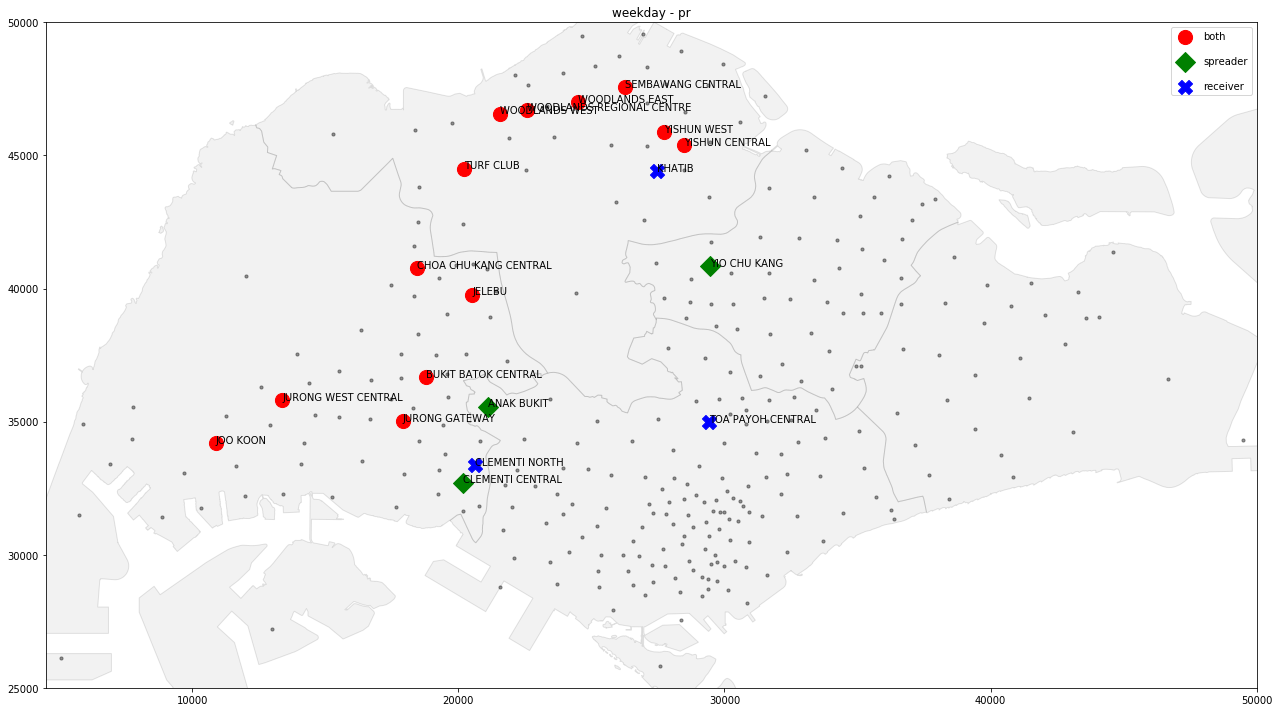

In [20]:
fig, ax = plt.subplots(figsize=(20,10))

col_method = "pr"
day = "weekday"
this_df = weekday_res
spread_col = "cal_{}_spreader".format(col_method)
receiv_col = "cal_{}_receiver".format(col_method)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

top_df_out = get_top(this_df, spread_col, times_std=2.)
top_df_inc = get_top(this_df, receiv_col, times_std=2.)
out_nodes = set(top_df_out["node"].tolist())
inc_nodes = set(top_df_inc["node"].tolist())

both = list(out_nodes.intersection(inc_nodes))
out_only = list(out_nodes.difference(inc_nodes))
inc_only = list(inc_nodes.difference(out_nodes))

xs_both, ys_both = get_pos(both, pos)
xs_out, ys_out = get_pos(out_only, pos)
xs_inc, ys_inc = get_pos(inc_only, pos)

ax.scatter(xs_both, ys_both, s=200, c="red", label="both", zorder=3, marker="o")
ax.scatter(xs_out, ys_out, s=200, c="green", label="spreader", zorder=3, marker="D")
ax.scatter(xs_inc, ys_inc, s=200, c="blue", label="receiver", zorder=3, marker="X")
ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = list(out_nodes | inc_nodes)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))
    
ax.legend(labelspacing=1.5, )
ax.set_title("{} - {}".format(day, col_method))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/superSR-{}-{}.png".format(day, col_method), dpi=100, bbox_inches="tight")

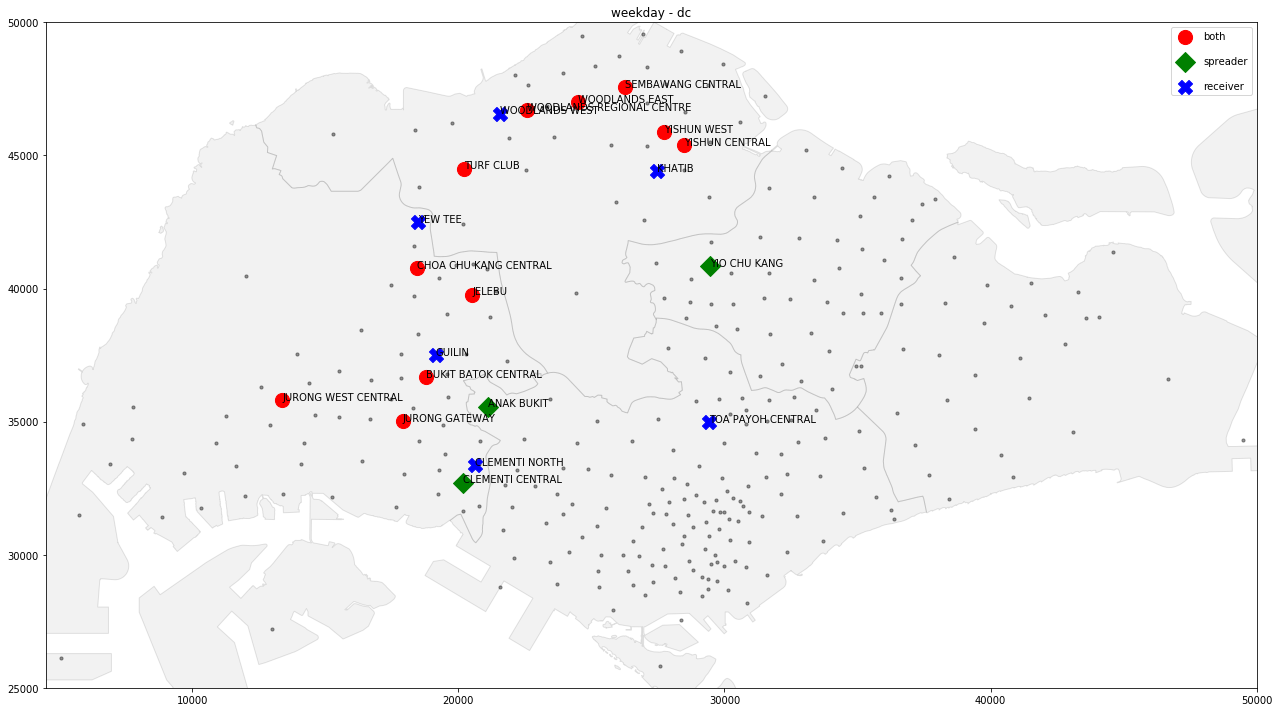

In [21]:
fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
day = "weekday"
this_df = weekday_res
spread_col = "cal_{}_spreader".format(col_method)
receiv_col = "cal_{}_receiver".format(col_method)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

top_df_out = get_top(this_df, spread_col, times_std=2.)
top_df_inc = get_top(this_df, receiv_col, times_std=2.)
out_nodes = set(top_df_out["node"].tolist())
inc_nodes = set(top_df_inc["node"].tolist())

both = list(out_nodes.intersection(inc_nodes))
out_only = list(out_nodes.difference(inc_nodes))
inc_only = list(inc_nodes.difference(out_nodes))

xs_both, ys_both = get_pos(both, pos)
xs_out, ys_out = get_pos(out_only, pos)
xs_inc, ys_inc = get_pos(inc_only, pos)

ax.scatter(xs_both, ys_both, s=200, c="red", label="both", zorder=3, marker="o")
ax.scatter(xs_out, ys_out, s=200, c="green", label="spreader", zorder=3, marker="D")
ax.scatter(xs_inc, ys_inc, s=200, c="blue", label="receiver", zorder=3, marker="X")
ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = list(out_nodes | inc_nodes)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {}".format(day, col_method))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/superSR-{}-{}.png".format(day, col_method), dpi=100, bbox_inches="tight")

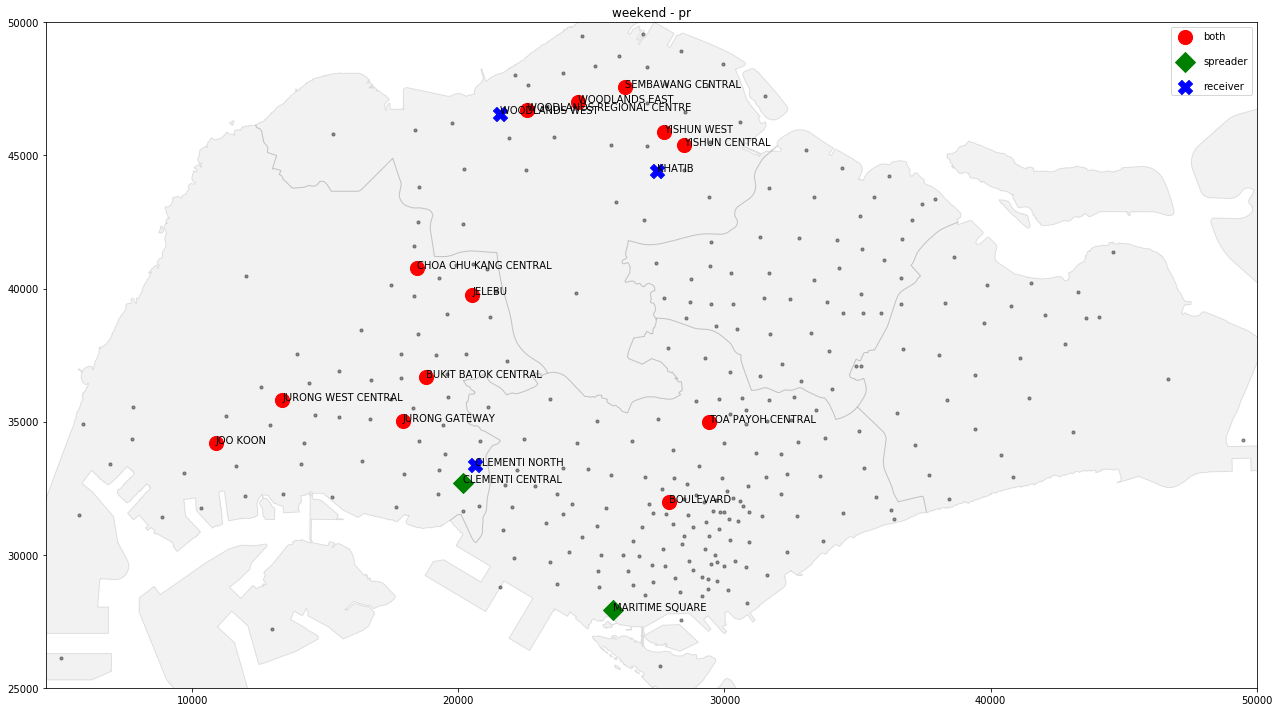

In [22]:
fig, ax = plt.subplots(figsize=(20,10))

col_method = "pr"
day = "weekend"
this_df = weekend_res
spread_col = "cal_{}_spreader".format(col_method)
receiv_col = "cal_{}_receiver".format(col_method)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

top_df_out = get_top(this_df, spread_col, times_std=2.)
top_df_inc = get_top(this_df, receiv_col, times_std=2.)
out_nodes = set(top_df_out["node"].tolist())
inc_nodes = set(top_df_inc["node"].tolist())

both = list(out_nodes.intersection(inc_nodes))
out_only = list(out_nodes.difference(inc_nodes))
inc_only = list(inc_nodes.difference(out_nodes))

xs_both, ys_both = get_pos(both, pos)
xs_out, ys_out = get_pos(out_only, pos)
xs_inc, ys_inc = get_pos(inc_only, pos)

ax.scatter(xs_both, ys_both, s=200, c="red", label="both", zorder=3, marker="o")
ax.scatter(xs_out, ys_out, s=200, c="green", label="spreader", zorder=3, marker="D")
ax.scatter(xs_inc, ys_inc, s=200, c="blue", label="receiver", zorder=3, marker="X")
ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = list(out_nodes | inc_nodes)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))
    
ax.legend(labelspacing=1.5, )
ax.set_title("{} - {}".format(day, col_method))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
#plt.savefig("figs/superSR-{}-{}.png".format(day, col_method), dpi=100, bbox_inches="tight")

In [24]:
df_merge = pd.merge(get_top_2levels(weekday_res, "cal_dc_spreader"), get_top_2levels(weekday_res, "cal_dc_receiver"), left_on="node", right_on="node", how="outer")#.sort_values(by=["top_x", "top_y"])
df_merge#[pd.isnull(df_merge["top_x"])]

,node,cal_dc_spreader,top_x,cal_dc_receiver,top_y
0,WOODLANDS REGIONAL CENTRE,0.772479,1.0,0.771579,1.0
1,JURONG WEST CENTRAL,0.737731,1.0,0.744637,1.0
2,JURONG GATEWAY,0.733459,1.0,0.689382,1.0
3,CHOA CHU KANG CENTRAL,0.714085,1.0,0.715821,1.0
4,YISHUN WEST,0.664467,1.0,0.632857,1.0
5,BUKIT BATOK CENTRAL,0.648233,1.0,0.620309,1.0
6,SEMBAWANG CENTRAL,0.626422,1.0,0.627170,1.0
7,WOODLANDS EAST,0.612356,1.0,0.616207,1.0
8,JELEBU,0.533988,1.0,0.544961,1.0
9,YISHUN CENTRAL,0.524948,1.0,0.518893,1.0


In [25]:
weekday_res.head()

,node,cal_dc_spreader,cal_hh,cal_pr_spreader,cal_dc_receiver,cal_ha,cal_pr_receiver
ind,,,,,,,
0,TAMPINES EAST,0.386216,0.386730,0.364033,0.423249,0.423249,0.398408
1,SERANGOON CENTRAL,0.273305,0.225932,0.256277,0.242025,0.206932,0.228909
2,BEDOK NORTH,0.267416,0.268577,0.250001,0.242039,0.244966,0.225299
3,GEYLANG EAST,0.290295,0.279854,0.270455,0.278489,0.273845,0.261286
4,TOA PAYOH CENTRAL,0.478774,0.409355,0.466794,0.500865,0.437605,0.486484


In [26]:
cols = [col for col in weekday_res.columns if not(col=="node")]
cols2 = []
lvl_cols = {}
for col in cols:
    this_col = weekday_res[col]
    this_mean = this_col.mean()
    this_std = this_col.std()
    lvl = []
    for v in this_col:
        if v>=this_mean+2*this_std:
            lvl.append(1)
        elif v>=this_mean+this_std:
            lvl.append(2)
        else:
            lvl.append(3)
    new_col = col.replace("cal", "lvl")
    lvl_cols[new_col] = lvl
    cols2.append(new_col)
    
lvl_cols.update({"node": weekday_res["node"]})
lvl_res = pd.DataFrame.from_dict(lvl_cols)
lvl_res = lvl_res[["node"]+cols2]
lvl_res.head()

,node,lvl_dc_spreader,lvl_hh,lvl_pr_spreader,lvl_dc_receiver,lvl_ha,lvl_pr_receiver
ind,,,,,,,
0,TAMPINES EAST,2,2,2,2,2,2
1,SERANGOON CENTRAL,3,3,3,3,3,3
2,BEDOK NORTH,3,3,3,3,3,3
3,GEYLANG EAST,3,3,3,3,3,3
4,TOA PAYOH CENTRAL,2,2,2,1,2,1


In [27]:
lvl_res.to_csv("Super_SR_lvl_weekday.csv", index_label="ind")

In [28]:
cols = [col for col in weekend_res.columns if not(col=="node")]
cols2 = []
lvl_cols = {}
for col in cols:
    this_col = weekend_res[col]
    this_mean = this_col.mean()
    this_std = this_col.std()
    lvl = []
    for v in this_col:
        if v>=this_mean+2*this_std:
            lvl.append(1)
        elif v>=this_mean+this_std:
            lvl.append(2)
        else:
            lvl.append(3)
    new_col = col.replace("cal", "lvl")
    lvl_cols[new_col] = lvl
    cols2.append(new_col)
    
lvl_cols.update({"node": weekend_res["node"]})
lvl_res = pd.DataFrame.from_dict(lvl_cols)
lvl_res = lvl_res[["node"]+cols2]
lvl_res.head()

,node,lvl_dc_spreader,lvl_hh,lvl_pr_spreader,lvl_dc_receiver,lvl_ha,lvl_pr_receiver
ind,,,,,,,
0,TAMPINES EAST,2,2,2,2,2,2
1,SERANGOON CENTRAL,2,2,2,3,3,3
2,BEDOK NORTH,3,3,3,3,3,3
3,GEYLANG EAST,3,2,3,3,2,3
4,TOA PAYOH CENTRAL,1,1,1,1,1,1


In [29]:
lvl_res.to_csv("Super_SR_lvl_weekend.csv", index_label="ind")

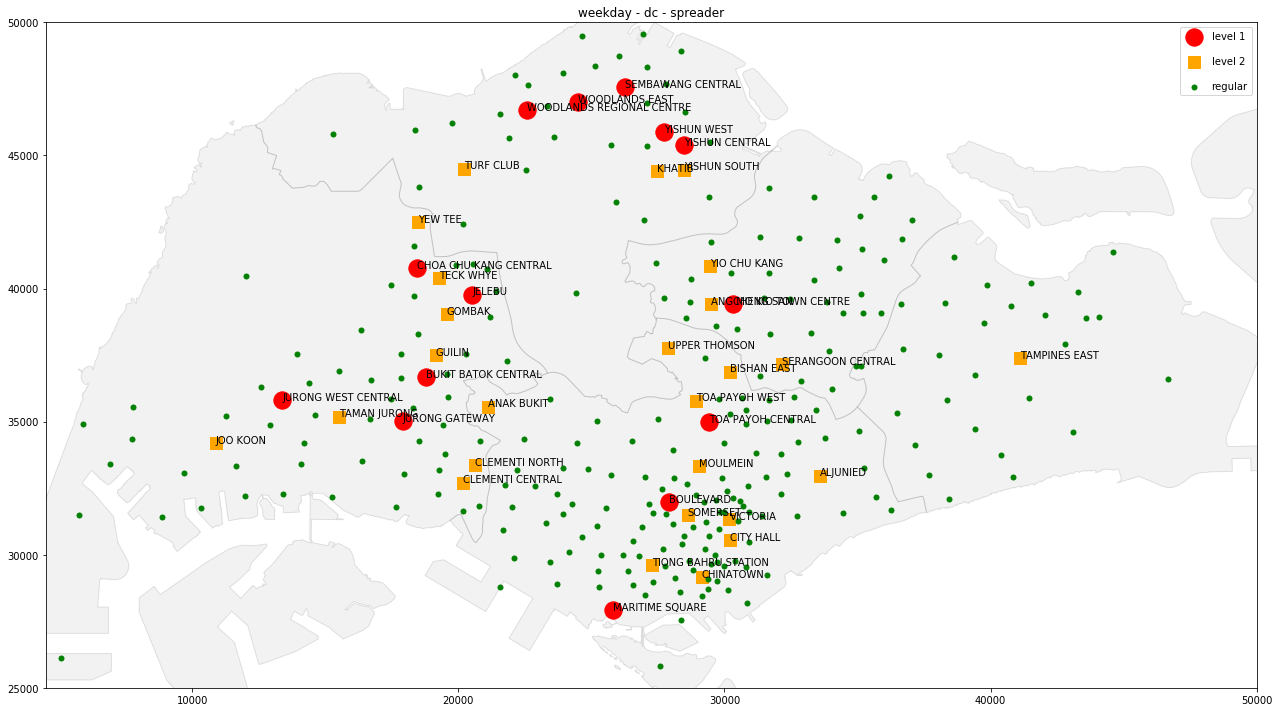

In [30]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "spreader"
day = "weekday"
this_df = weekday_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}.png".format(day, col_method), dpi=100, bbox_inches="tight")


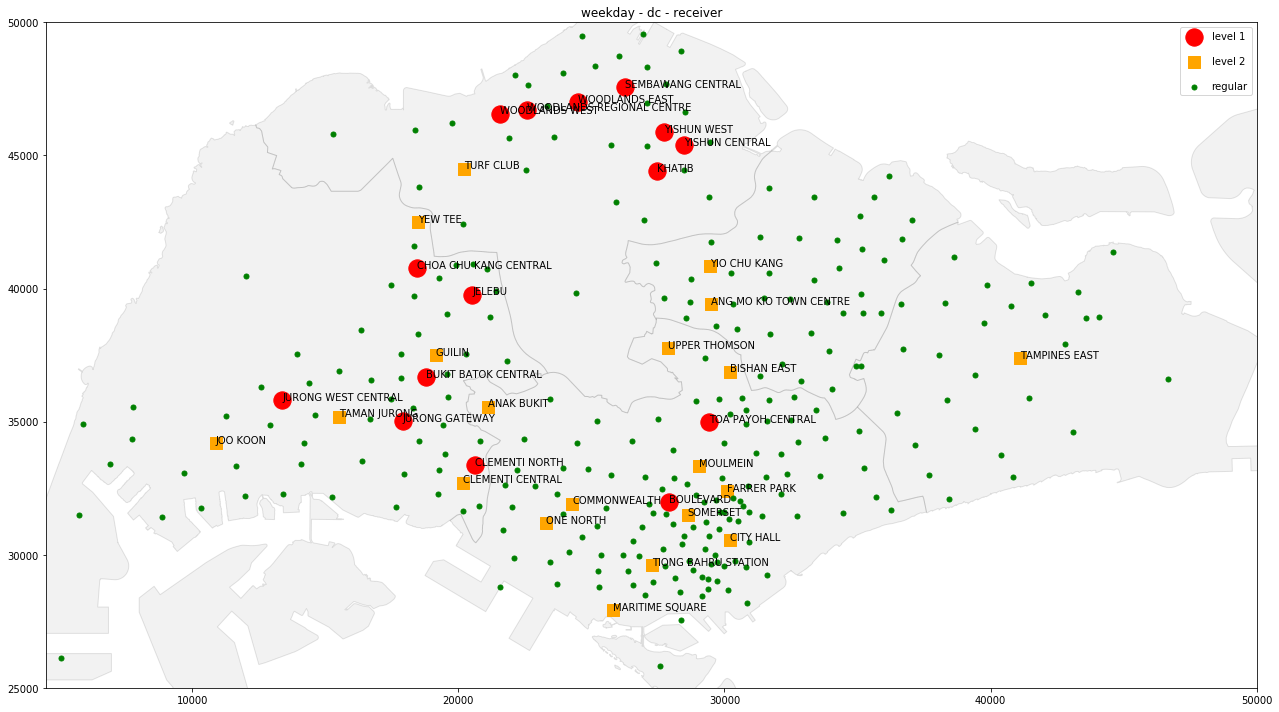

In [31]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "receiver"
day = "weekday"
this_df = weekday_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


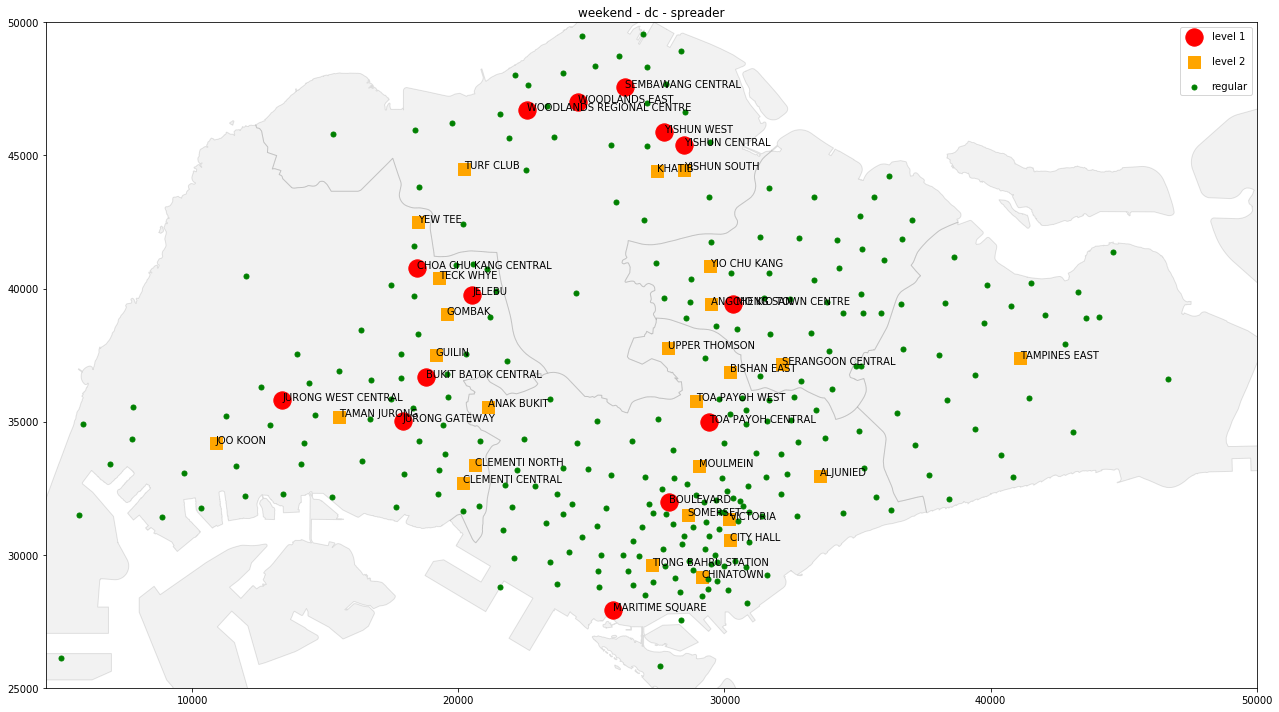

In [32]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "spreader"
day = "weekend"
this_df = weekend_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


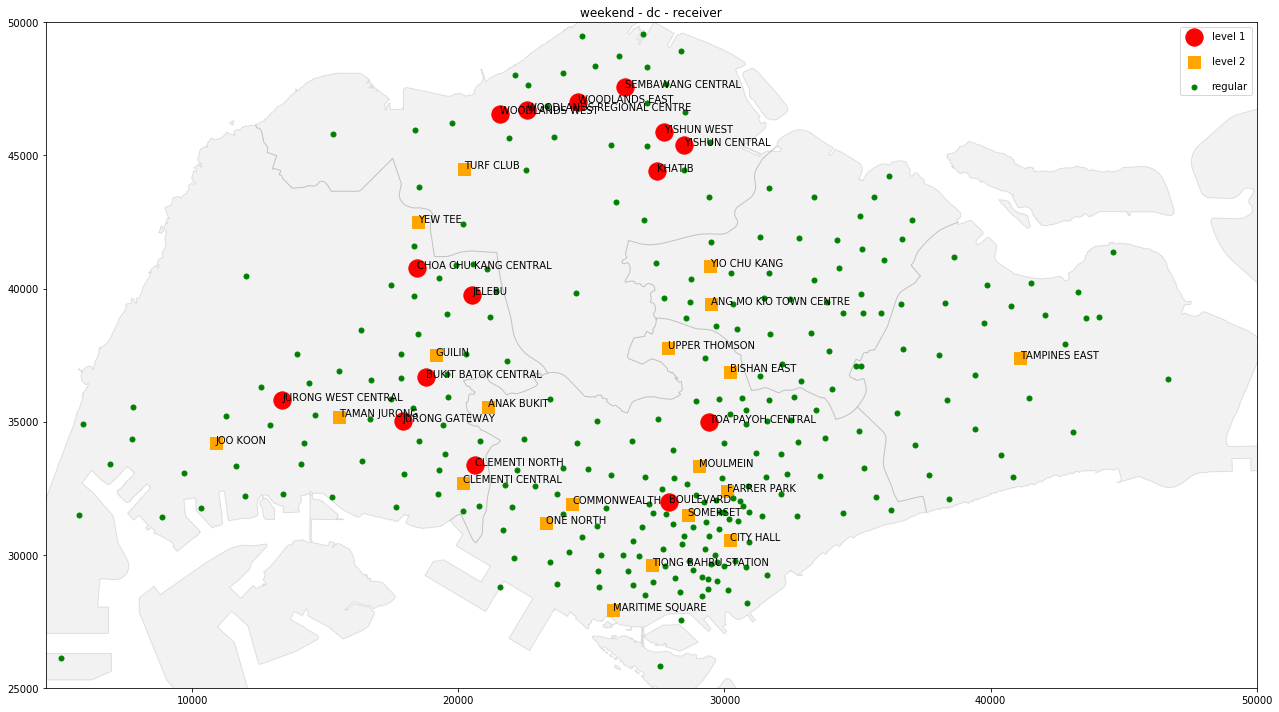

In [33]:

fig, ax = plt.subplots(figsize=(20,10))

col_method = "dc"
direction = "receiver"
day = "weekend"
this_df = weekend_res
this_col = "lvl_{}_{}".format(col_method, direction)

region.plot(ax=ax, color="grey", edgecolor="k", alpha=0.1)

lvl_res

lvl1 = lvl_res[lvl_res[this_col]==1]["node"].tolist()
lvl2 = lvl_res[lvl_res[this_col]==2]["node"].tolist()
lvl3 = lvl_res[lvl_res[this_col]==3]["node"].tolist()

xs_1, ys_1 = get_pos(lvl1, pos)
xs_2, ys_2 = get_pos(lvl2, pos)
xs_3, ys_3 = get_pos(lvl3, pos)

ax.scatter(xs_1, ys_1, s=300, c="red", label="level 1", zorder=3, marker="o")
ax.scatter(xs_2, ys_2, s=150, c="orange", label="level 2", zorder=3, marker="s")
ax.scatter(xs_3, ys_3, s=100, c="green", label="regular", zorder=3, marker=".")
#ax.scatter([x for n,(x,y) in pos.items() ], [y for n,(x,y) in pos.items() ], s=10, c="k", zorder=2, alpha=.4)

all_nodes = set(lvl1) | set(lvl2)
xs_all, ys_all = get_pos(all_nodes, pos)
for i, txt in enumerate(all_nodes):
    ax.annotate(txt, (xs_all[i], ys_all[i]))

ax.legend(labelspacing=1.5, )
ax.set_title("{} - {} - {}".format(day, col_method, direction))
ax.set_xlim([4500,50000])
ax.set_ylim([25000,50000])
plt.tight_layout()
plt.savefig("../b-calculation/figs/val_dist-{}-{}-{}.png".format(day, col_method, direction), dpi=100, bbox_inches="tight")


In [45]:
def draw_parallel(df, top_nodes, cols=None):
    if cols is None:
        cols = [ col for col in df.columns if col!="node"]
    lines = []
    df2 = df.set_index("node")
    #print(df2.head())
    for n in top_nodes:
        line = []
        row = df2.loc[n]
        #print(row)
        for col in cols:
            line.append( row[col] )
        #print(line)
        lines.append(line)
        #break
    fig, ax = plt.subplots(figsize=(16,12))
    for line, n in zip(lines, top_nodes):
        ax.plot(line, label=n)
    for i in range(len(cols)):
        ax.axvline(x=i, ls=':', c='k')
    ax.set_xticks(list(range(len(cols))))
    ax.set_xticklabels(cols)
    ax.set_ylim([0,1])
    plt.legend()
    plt.tight_layout()